<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/7.%20MNIST%20using%20Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST using Tensorflow 2.0
参考サイト：<br>
https://qiita.com/koshian2/items/5029028fe6d01b243f44 <br>
https://ai-scholar.tech/image-recognition/tensorflow2-0-alpha/

#Tensorflow 2.0のセットアップ

In [1]:
!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf
tf.__version__ # '2.0.0'

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-alpha0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==2.0.0-alpha0


'2.9.2'

#データのダウンロード

In [16]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#画像を表示してみる

In [17]:
len(x_train)

60000

In [18]:
x_train[0].shape

(28, 28)

In [ ]:
from PIL import Image
plt.imshow(x_train[0])

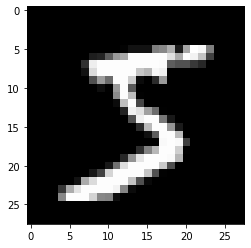

In [20]:
plt.gray()
plt.imshow(x_train[0])

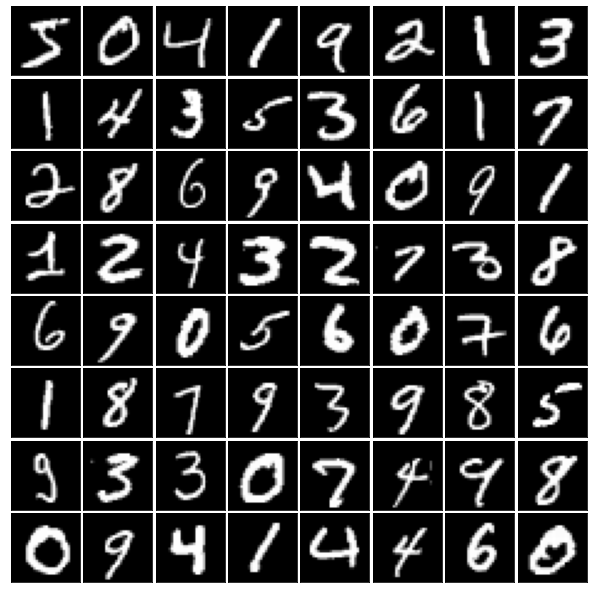

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# MNISTデータの表示
W = 8  # 横に並べる個数
H = 8   # 縦に並べる個数
fig = plt.figure(figsize=(H, W))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.0, hspace=0.05, wspace=0.05)
for i in range(W*H):
    ax = fig.add_subplot(H, W, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

plt.show()

#Modelの作成

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#モデルの訓練と評価

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

#推測結果の表示①

313/313 [==============================] - 0s 1ms/step


array([3.9366356e-08, 1.2092742e-09, 7.2270763e-07, 9.6653566e-05,
       3.7453048e-11, 4.5933518e-08, 2.7536455e-15, 9.9990237e-01,
       6.4262608e-08, 1.8089796e-07], dtype=float32)

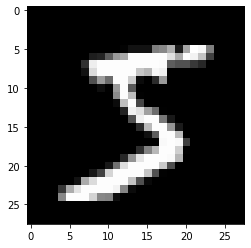

In [27]:
plt.imshow(x_train[0], cmap='gray')
predictions = model.predict(x_test)
predictions[0]

#推測結果の表示②

In [29]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i] 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]),
    color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i] 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    thisplot = plt.bar(range(10), predictions_array, color="#777777") #ラベルの縦棒は10種類
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')  #Predicted_labelは赤グラフ
    thisplot[true_label].set_color('blue')      #True_labelは青グラフ

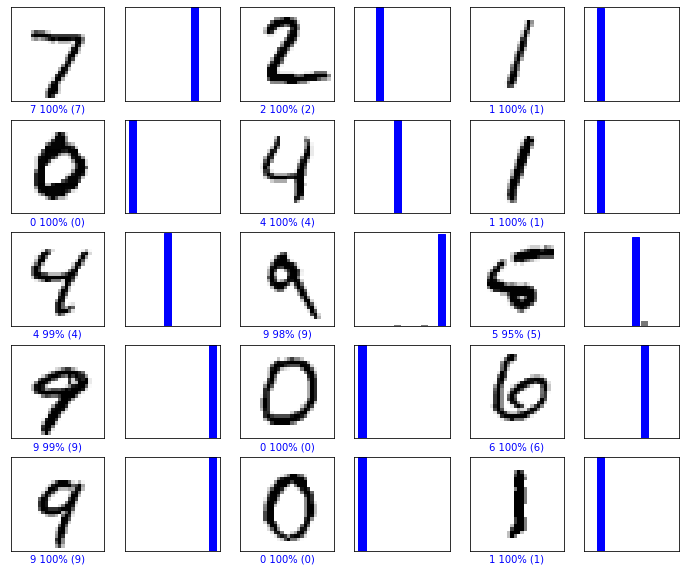

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.show()